#  Fashion MNIST Classification (From Scratch with TensorFlow)

## Author: Ibrahim Hamada Mosaad  
## Project Type: Beginner Neural Network (No CNN)  
## Goal: Understand the full TensorFlow pipeline step by step


In this project, you will classify Fashion-MNIST dataset using convolutional neural networks.

##  Overview

In this project, we build a **basic neural network** to classify images of clothing
using the **Fashion MNIST** dataset.

This project focuses on **understanding the pipeline**, not achieving state-of-the-art accuracy.

You will learn:
- How datasets are loaded
- How images are preprocessed
- How a simple neural network works
- How training and evaluation happen


##  Install & Import Dependencies


In [ ]:
!pip install -U tensorflow tensorflow_datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 620.7/620.7 MB 213.9 MB/s eta 0:00:0100:01

In [16]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt
import math
import logging
import os
# Disable unnecessary logs
tfds.disable_progress_bar()
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


##  Loading the Fashion MNIST Dataset

Fashion MNIST contains **70,000 grayscale images** (28×28 pixels)
distributed across **10 clothing categories**.


In [17]:
dataset, metadata = tfds.load(
    'fashion_mnist',
    as_supervised=True,
    with_info=True
)

train_dataset, test_dataset = dataset['train'], dataset['test']


##  Dataset Details

- Training samples: 60,000
- Test samples: 10,000
- Image shape: 28 × 28
- Pixel values: [0, 255]
- Labels: integers from 0 to 9


##  Clothing Categories


In [18]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


##  Visualizing Sample Images


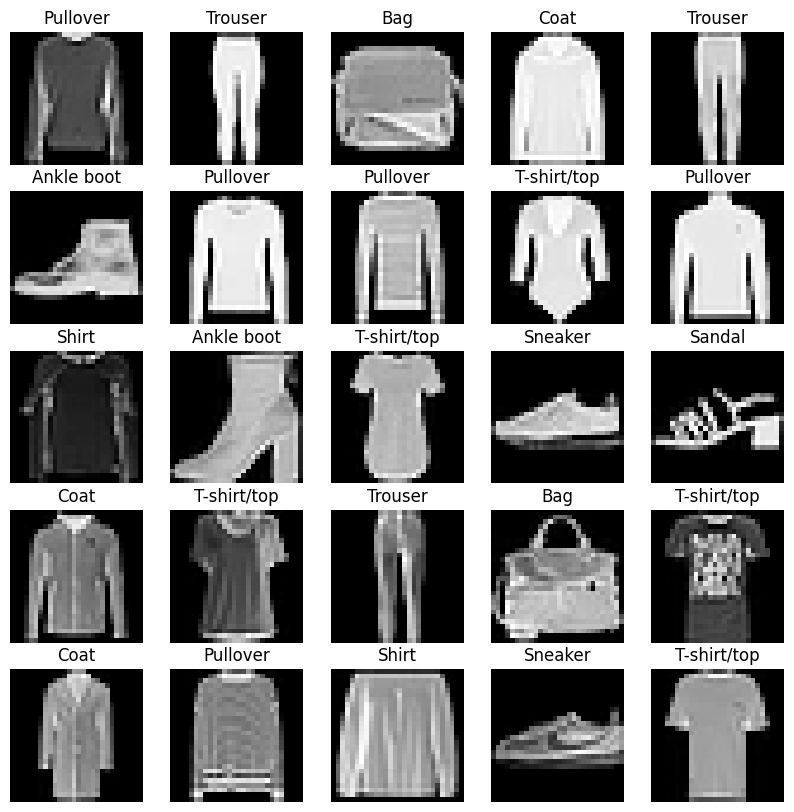

In [19]:
plt.figure(figsize=(10,10))

for i, (image, label) in enumerate(train_dataset.take(25)):
    plt.subplot(5,5,i+1)
    plt.imshow(image, cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')

plt.show()


##  Data Preprocessing

Neural networks work better when inputs are normalized.
We scale pixel values from [0,255] → [0,1].


In [20]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(normalize)
test_dataset  = test_dataset.map(normalize)


##  Preparing Data (Batching & Shuffling)


In [21]:
BATCH_SIZE = 32

train_dataset = train_dataset.shuffle(10000).batch(BATCH_SIZE)
test_dataset  = test_dataset.batch(BATCH_SIZE)


##  Building a Simple Neural Network

 No CNN  
 No fancy tricks  
Just **Dense layers**


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

##  Compiling the Model


In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


##  Training the Model


In [24]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7770 - loss: 0.6349 - val_accuracy: 0.8451 - val_loss: 0.4276
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8621 - loss: 0.3855 - val_accuracy: 0.8635 - val_loss: 0.3850
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8782 - loss: 0.3435 - val_accuracy: 0.8706 - val_loss: 0.3560
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8843 - loss: 0.3171 - val_accuracy: 0.8721 - val_loss: 0.3584
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8906 - loss: 0.2963 - val_accuracy: 0.8723 - val_loss: 0.3571
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8969 - loss: 0.2831 - val_accuracy: 0.8742 - val_loss: 0.3576
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9008 - loss: 0.2707 - val_accuracy: 0.8750 - val_loss: 0.3547
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9048 - loss: 0.2593 - 

##  Model Evaluation

In [29]:
import os

IMAGES_DIR = "/kaggle/working/images"
os.makedirs(IMAGES_DIR, exist_ok=True)


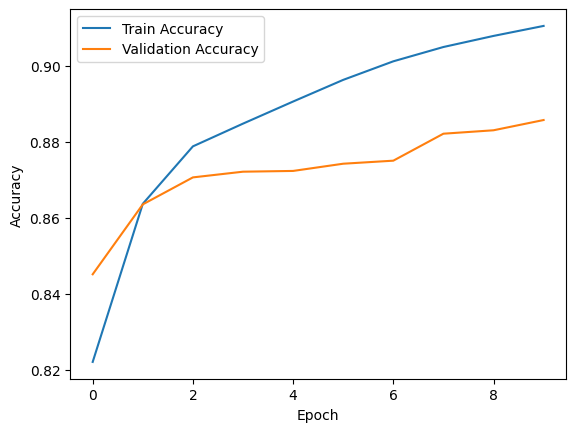

In [30]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig(f"{IMAGES_DIR}/training_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

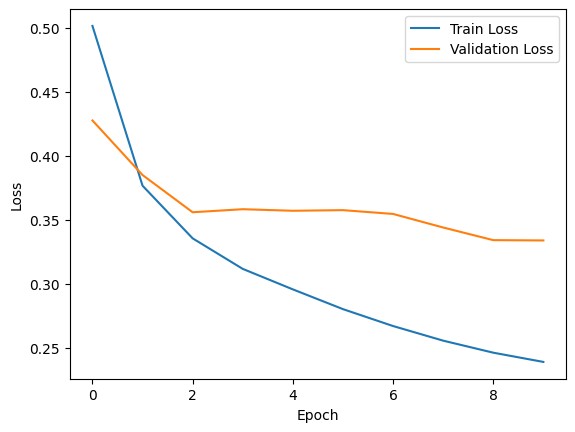

In [31]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig(f"{IMAGES_DIR}/training_loss.png", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8853 - loss: 0.3324
Test Accuracy: 0.885699987411499


## Making Predictions

In [33]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_dataset)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


##  Conclusion

This project demonstrates:
- A full TensorFlow workflow
- Image classification without CNNs
- How math + data + code come together

Next step 👉 Replace Dense layers with **CNN**